In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
filepath = os.path.join("data", "iris.csv")
iris = pd.read_csv(filepath, index_col=0)

In [54]:
print(iris.shape)

(150, 5)


In [55]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### line plot

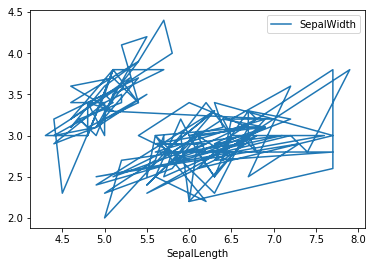

In [58]:
iris.plot(x='SepalLength', y='SepalWidth')
plt.show()

### scatter plot

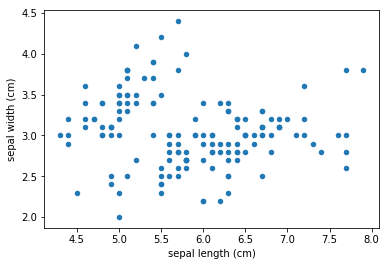

In [59]:
iris.plot(x='SepalLength', y='SepalWidth',kind='scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### box plot

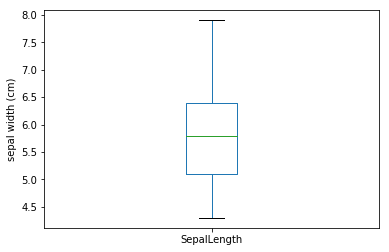

In [61]:
iris.plot(y='SepalLength', kind='box')
plt.ylabel('sepal width (cm)')
plt.show()

### histogram

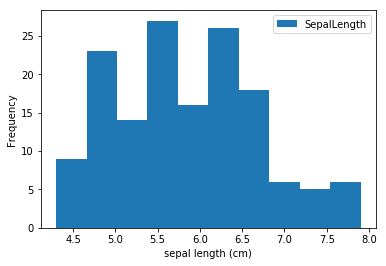

In [62]:
iris.plot(y='SepalLength', kind='hist')
plt.xlabel('sepal length (cm)')
plt.show()

In [ ]:
df.plot() method places Index values on the x-axis by default.
three different DataFrame plot idioms:
* df.plot(kind=‘hist’)
* df.plt.hist()
* df.hist()
syntax/results differ!

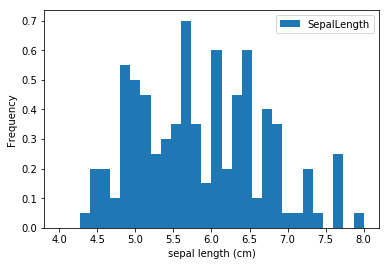

In [63]:
#customizing histogram
iris.plot(y='SepalLength', kind='hist',bins=30, range=(4,8), normed=True)
plt.xlabel('sepal length (cm)')
plt.show()

### cumulative distribution function

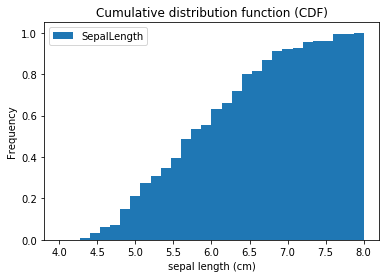

In [64]:
iris.plot(y='SepalLength', kind='hist', bins=30, range=(4,8), cumulative=True, normed=True)
plt.xlabel('sepal length (cm)')
plt.title('Cumulative distribution function (CDF)')
plt.show()

### separating types of data (species of flowers)

In [65]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


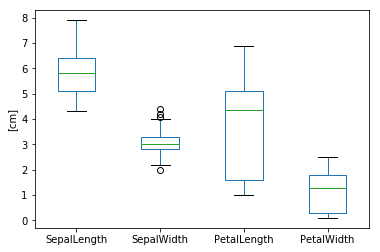

In [66]:
iris.plot(kind= 'box')
plt.ylabel('[cm]')
plt.show()

In [68]:
iris['Name'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Name, dtype: object

In [ ]:
count: # non-null entries
unique: # distinct values
top: most frequent category
freq: # occurrences of top

In [69]:
iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [70]:
#filtering by type / species
indices = iris['Name'] == 'Iris-setosa'
setosa = iris.loc[indices,:] # extract new DataFrame
indices = iris['Name'] == 'Iris-versicolor'
versicolor = iris.loc[indices,:] # extract new DataFrame
indices = iris['Name'] == 'Iris-virginica'
virginica = iris.loc[indices,:] # extract new DataFrame

In [72]:
del setosa['Name'],versicolor['Name'],virginica['Name']

# visual EDA: all data

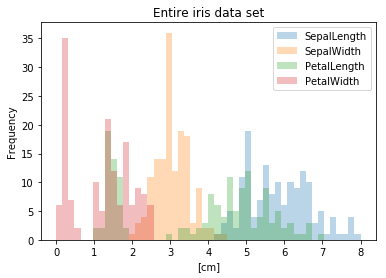

In [73]:
iris.plot(kind= 'hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Entire iris data set')
plt.xlabel('[cm]')
plt.show()

# visual EDA: individual factors

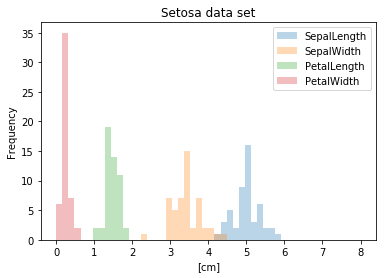

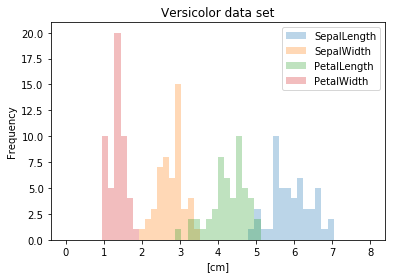

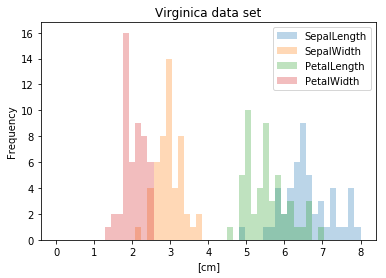

In [75]:
setosa.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Setosa data set')
plt.xlabel('[cm]')
versicolor.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Versicolor data set')
plt.xlabel('[cm]')
virginica.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Virginica data set')
plt.xlabel('[cm]')
plt.show()

# statistical EDA

In [76]:
describe_all = iris.describe()
describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

In [80]:
#computing errors
error_setosa = 100 * np.abs(describe_setosa - describe_all)
error_setosa = error_setosa/describe_setosa
error_versicolor = 100 * np.abs(describe_versicolor - describe_all)
error_versicolor = error_versicolor/describe_versicolor
error_virginica = 100 * np.abs(describe_virginica - describe_all)
error_virginica = error_virginica/describe_virginica

In [81]:
print(error_setosa)

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   200.000000  200.000000   200.000000  200.000000
mean     16.726595   10.649503   156.739526  391.256831
std     134.919250   13.796994   916.891608  611.840574
min       0.000000   13.043478     0.000000    0.000000
25%       6.250000   10.400000    14.285714   50.000000
50%      16.000000   11.764706   190.000000  550.000000
75%      23.076923   10.204082   223.809524  500.000000
max      36.206897    0.000000   263.157895  316.666667
